In [1]:
import pandas as pd
import numpy as np

# Charger les données
df = pd.read_csv('C:/Users/hp/Downloads/M2 data scale/Spécialité/projet/archive/CO2 Emissions_Canada.csv')

# Aperçu des données
print(df.head())  # Afficher les 5 premières lignes
print(df.info())  # Résume les colonnes, types de données, et valeurs manquantes

    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

C:\Users\hp\AppData\Local\Temp\ipykernel_5416\1874173320.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
print(df.describe()) #Calcul de la moyenne, écart-type, max, min...

       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.000000         

In [3]:
#Le nombre de valeurs manquantes par colonnes:
print(df.isnull().sum())

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


### Nos hypothèses :
* La taille du moteur (Engine Size(L)) est positivement corrélée avec les émissions de CO2.
* La consommation de carburant combinée (Fuel Consumption Comb (L/100 km)) est positivement corrélée avec les émissions de CO2.
* Les véhicules diesel (Fuel Type = D) émettent moins de CO2 que ceux fonctionnant à l’essence (Fuel Type = Z).
* La transmission influence significativement les émissions de CO2.

In [4]:
# Identifier et afficher les doublons (toutes les colonnes)
doublons = df[df.duplicated()]
print(f"Nombre de doublons : {doublons.shape[0]}")
print("Doublons détectés :")
print(doublons)

# Supprimer les doublons et stocker les données sans doublons
df_sans_doublons = df.drop_duplicates()

# Afficher un aperçu des données sans doublons
print("Aperçu des données sans doublons :")
print(df_sans_doublons.head())


Nombre de doublons : 1103
Doublons détectés :
              Make       Model            Vehicle Class  Engine Size(L)  \
1075         ACURA     RDX AWD              SUV - SMALL             3.5   
1076         ACURA         RLX                 MID-SIZE             3.5   
1081    ALFA ROMEO          4C               TWO-SEATER             1.8   
1082  ASTON MARTIN         DB9              MINICOMPACT             5.9   
1084  ASTON MARTIN  V8 VANTAGE               TWO-SEATER             4.7   
...            ...         ...                      ...             ...   
7356        TOYOTA      Tundra  PICKUP TRUCK - STANDARD             5.7   
7365    VOLKSWAGEN    Golf GTI                  COMPACT             2.0   
7366    VOLKSWAGEN       Jetta                  COMPACT             1.4   
7367    VOLKSWAGEN       Jetta                  COMPACT             1.4   
7368    VOLKSWAGEN   Jetta GLI                  COMPACT             2.0   

      Cylinders Transmission Fuel Type  Fuel Consumpt

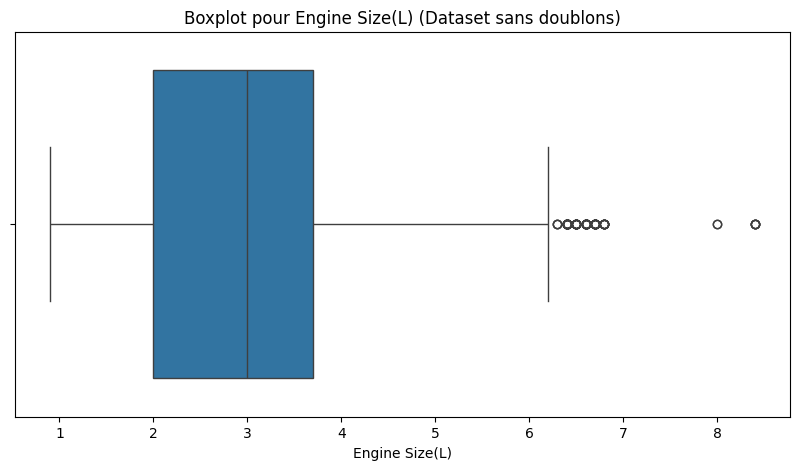

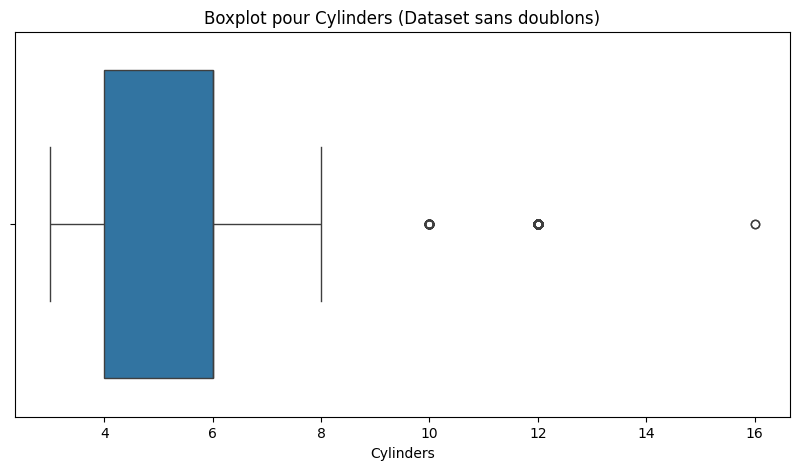

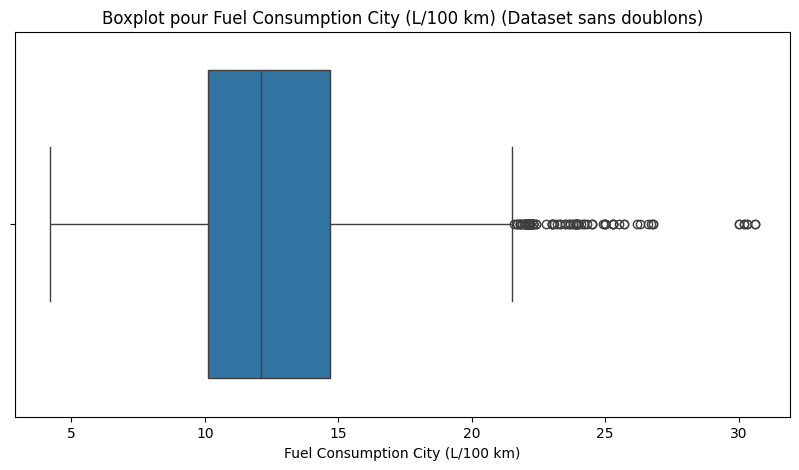

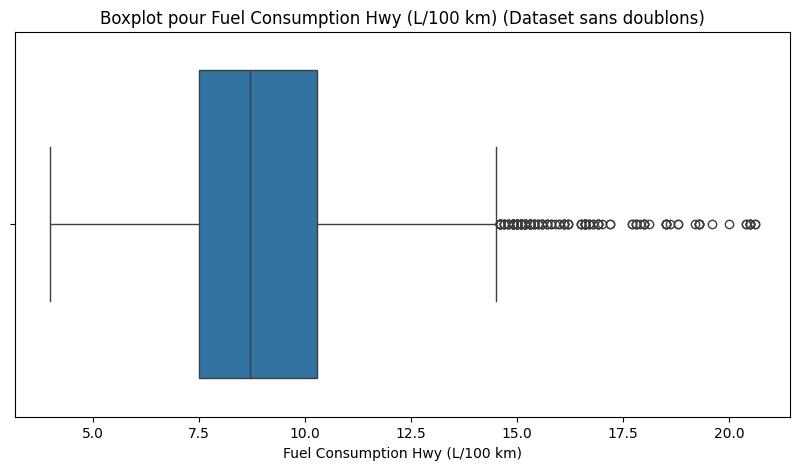

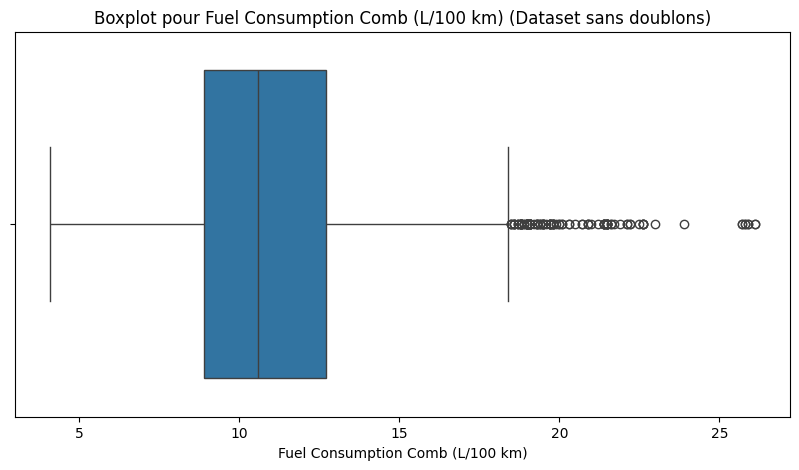

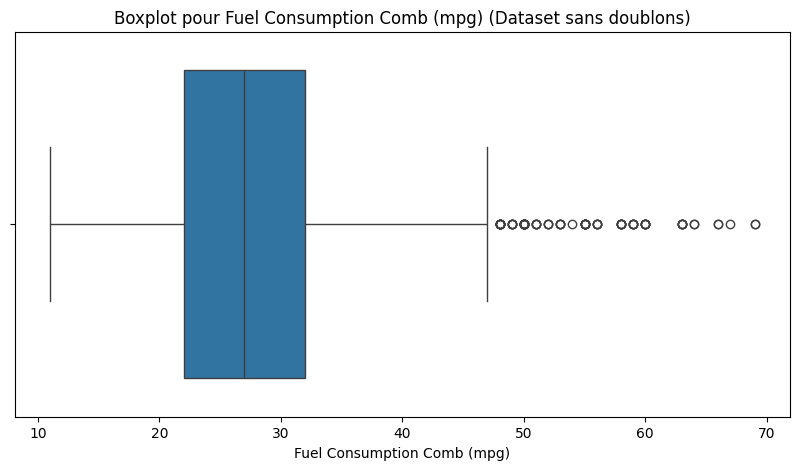

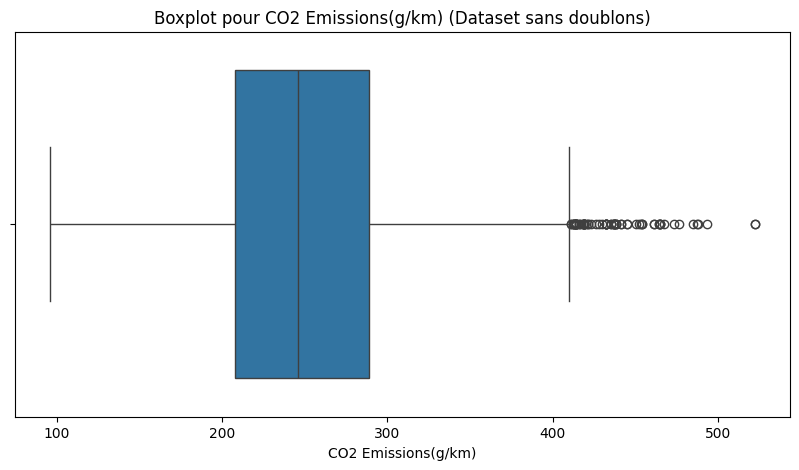

In [5]:
#Détection des valeurs aberrantes 
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des colonnes numériques
numeric_columns = df_sans_doublons.select_dtypes(include=['float64', 'int64']).columns

# Tracer des boxplots pour toutes les colonnes numériques dans le dataset sans doublons
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_sans_doublons, x=col)
    plt.title(f"Boxplot pour {col} (Dataset sans doublons)")
    plt.show()

In [68]:
# Calculer les bornes pour chaque colonne numérique
numeric_columns = df_sans_doublons.select_dtypes(include=['float64', 'int64']).columns

# Créer une copie de df_sans_doublons pour ne pas altérer les variables qualitatives
df_cleaned_numeric = df_sans_doublons.copy()

# Liste pour stocker le nombre d'outliers pour chaque colonne
outliers_count = {}

for col in numeric_columns:
    Q1 = df_cleaned_numeric[col].quantile(0.25)
    Q3 = df_cleaned_numeric[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrer les valeurs aberrantes
    outliers = df_cleaned_numeric[(df_cleaned_numeric[col] < lower_bound) | (df_cleaned_numeric[col] > upper_bound)]
    outliers_count[col] = len(outliers)

    # Garder uniquement les données dans les bornes pour cette colonne
    df_cleaned_numeric = df_cleaned_numeric[(df_cleaned_numeric[col] >= lower_bound) & (df_cleaned_numeric[col] <= upper_bound)]

# Vérifier le résultat après suppression des valeurs aberrantes
print("Dataset après suppression des valeurs aberrantes :")
print(df_cleaned_numeric.shape)


Dataset après suppression des valeurs aberrantes :
(5488, 12)


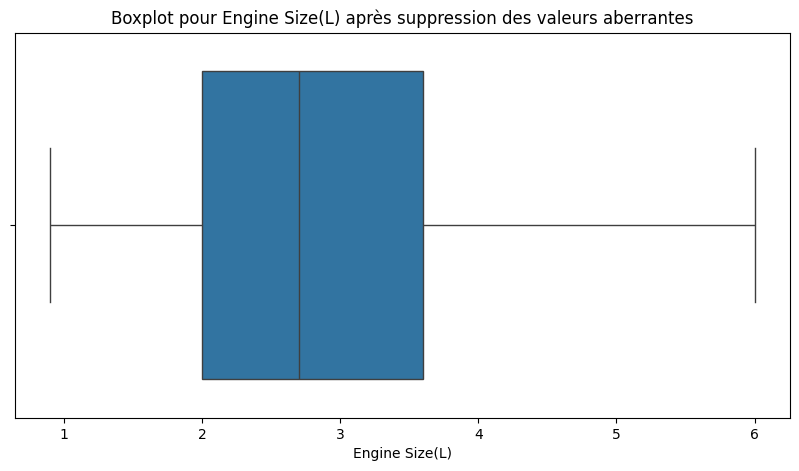

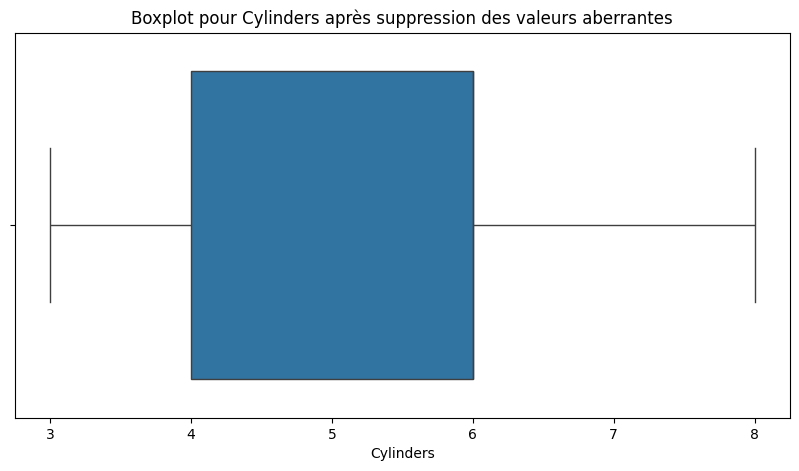

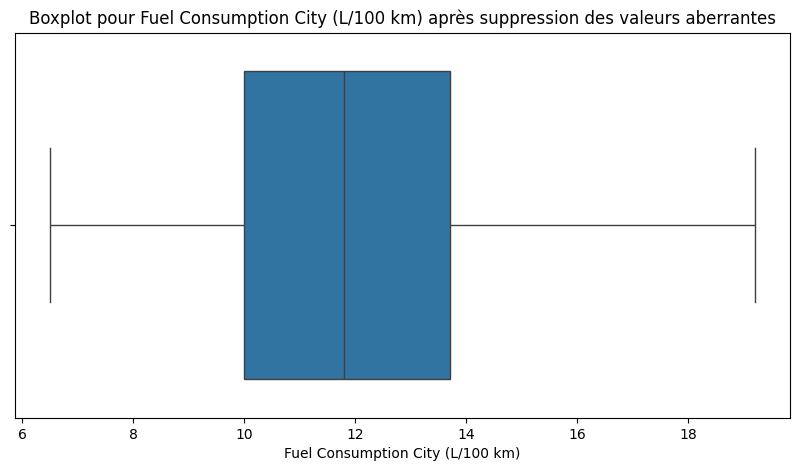

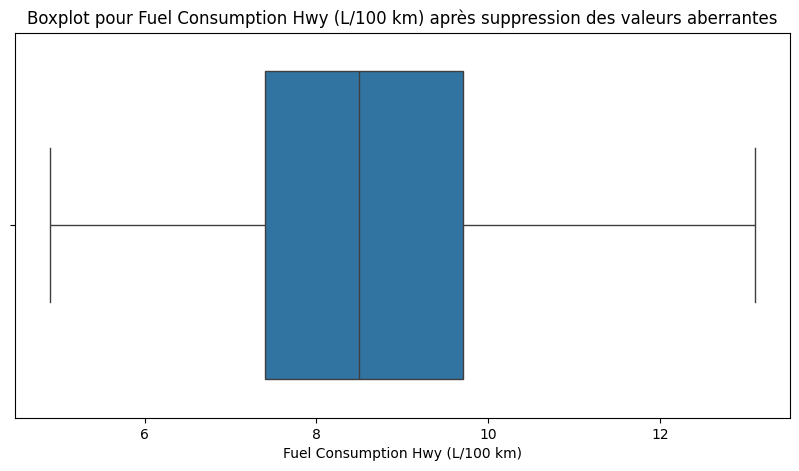

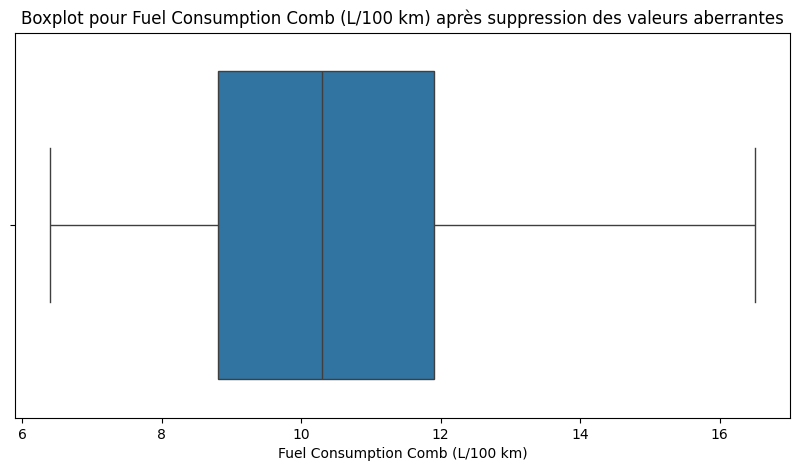

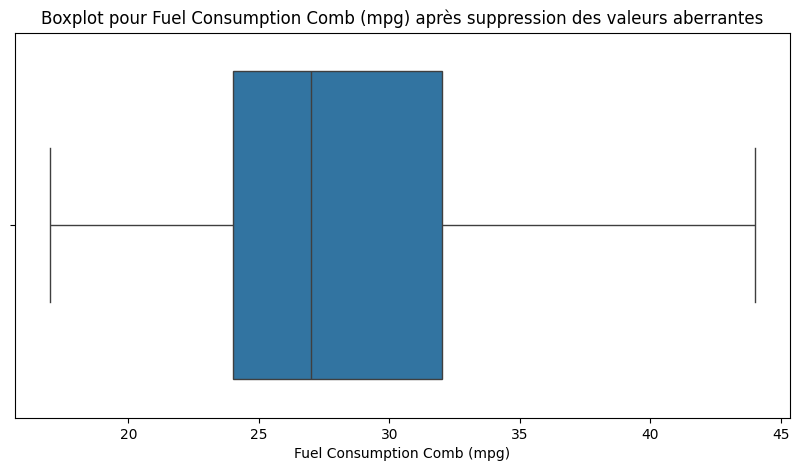

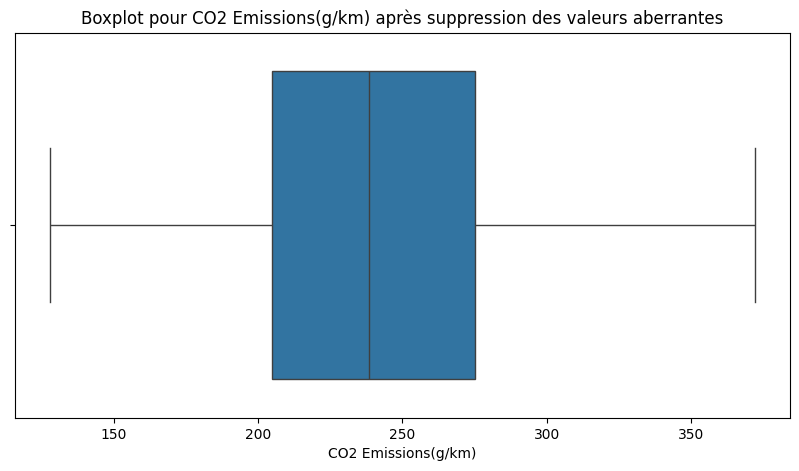

In [69]:
# Tracer des boxplots pour chaque colonne numérique après suppression des valeurs aberrantes
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_cleaned_numeric, x=col)
    plt.title(f"Boxplot pour {col} après suppression des valeurs aberrantes")
    plt.show()


In [73]:
# Créer un nouveau dataset après suppression des valeurs aberrantes (2e itération)
df_cleaned_numeric_final = df_cleaned_numeric.copy()

# Afficher les dimensions du nouveau dataset pour vérification
print("Dimensions du dataset final après nettoyage :", df_cleaned_numeric_final.shape)

Dimensions du dataset final après nettoyage : (5488, 12)


Nous n’avons pas détecté les valeurs aberrantes pour les variables descriptives car il n’y pas d’incohérences ou de fautes d’orthographes dans les valeurs(par exemple : "Toyota" et "TOYOTA") ou des valeurs manquantes ou ambiguës (par exemple des entrées comme "N/A", "Unknown" ou "Autre")

# Analyse de normalité des variables
Pour déterminer la méthode de corrélation la plus appropriée, nous vérifions si les variables suivent une loi normale. La corrélation de Pearson, qui mesure les relations linéaires, nécessite que les variables suivent une distribution normale. En revanche, Spearman et Kendall sont plus robustes aux distributions non normales. 

a. Visualisation graphique
On utilise deux graphiques: 
- L'histogramme, représente la fréquence des valeurs de chacune des variables
- La courbe de densité superposée, donne une estimation de la distribution. Si les points suivent une ligne droite dans le graphique, cela indique que la variable suit une loi normale.

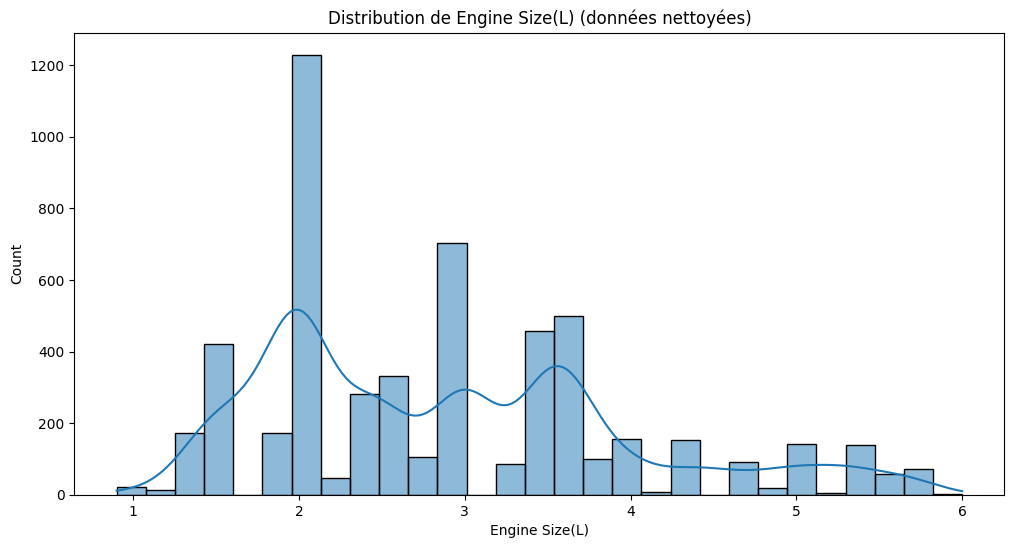

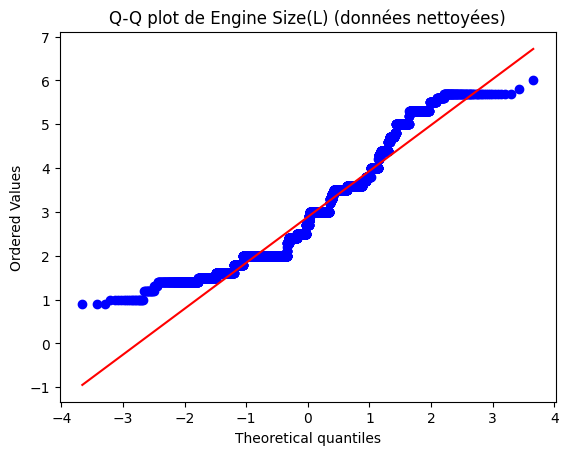

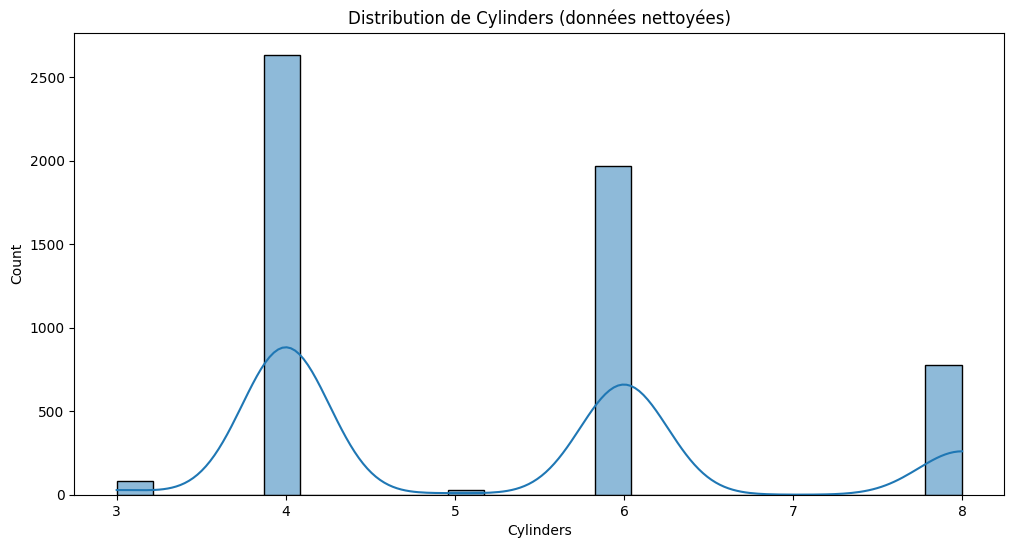

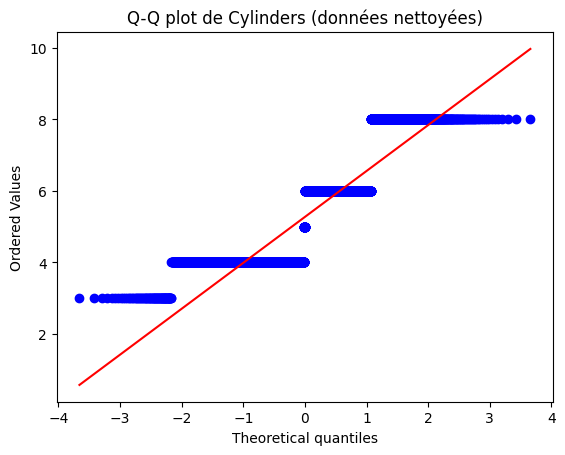

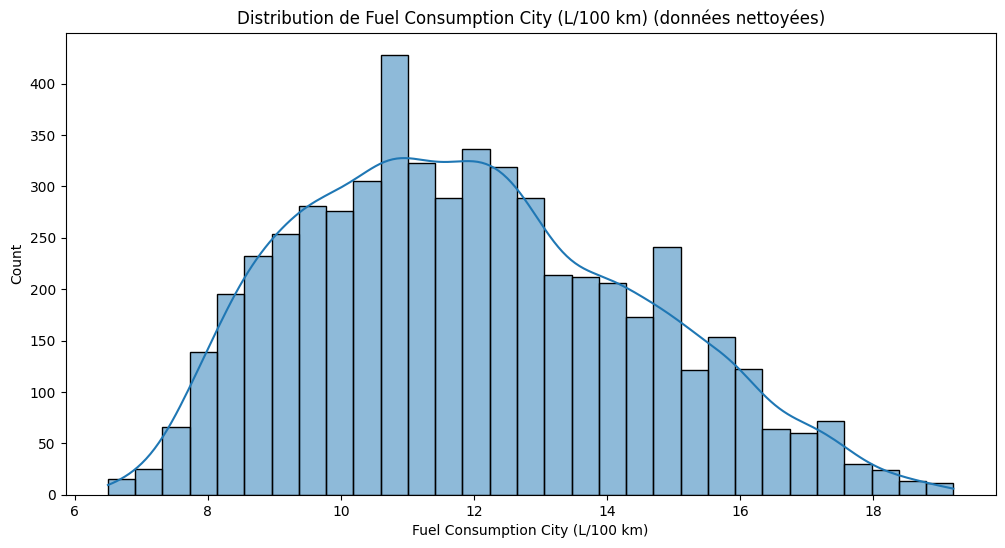

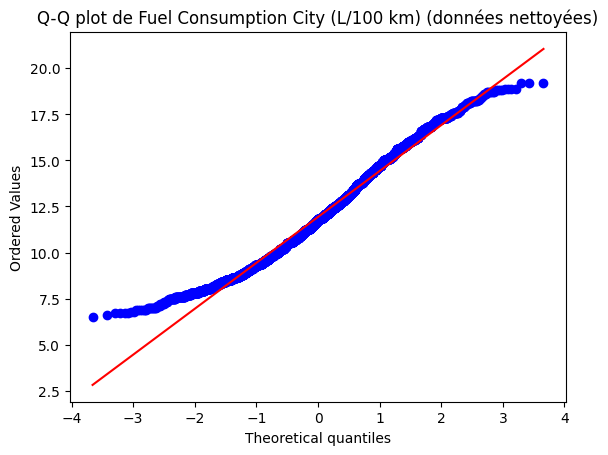

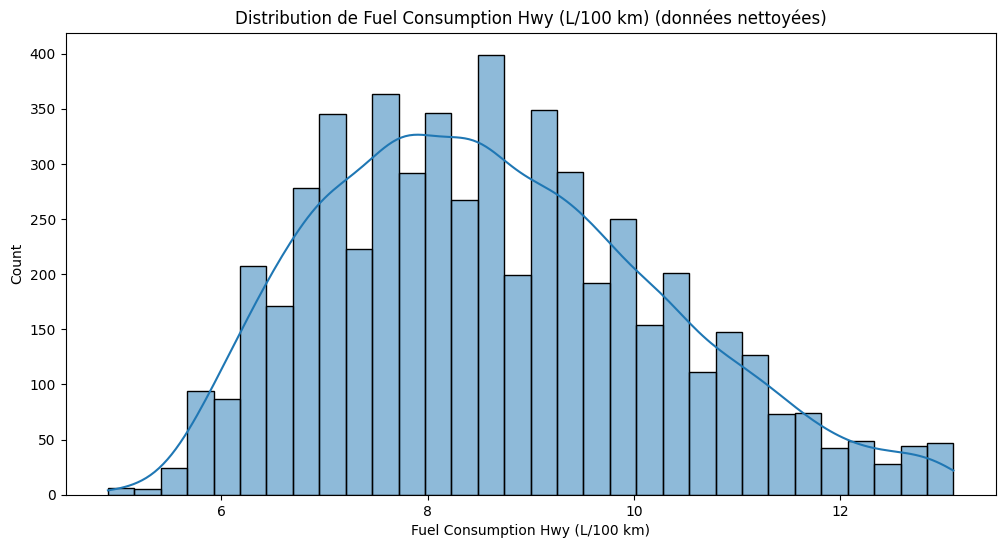

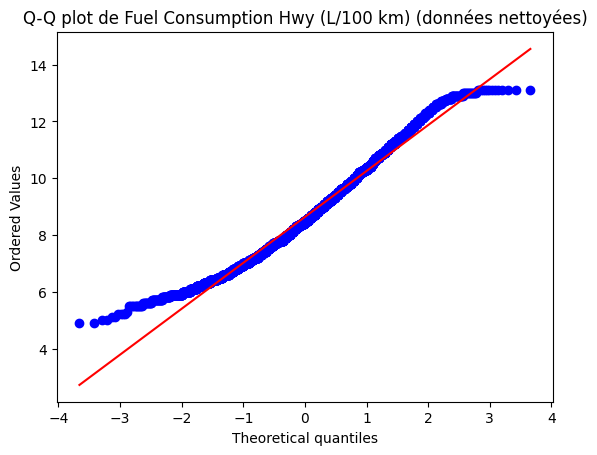

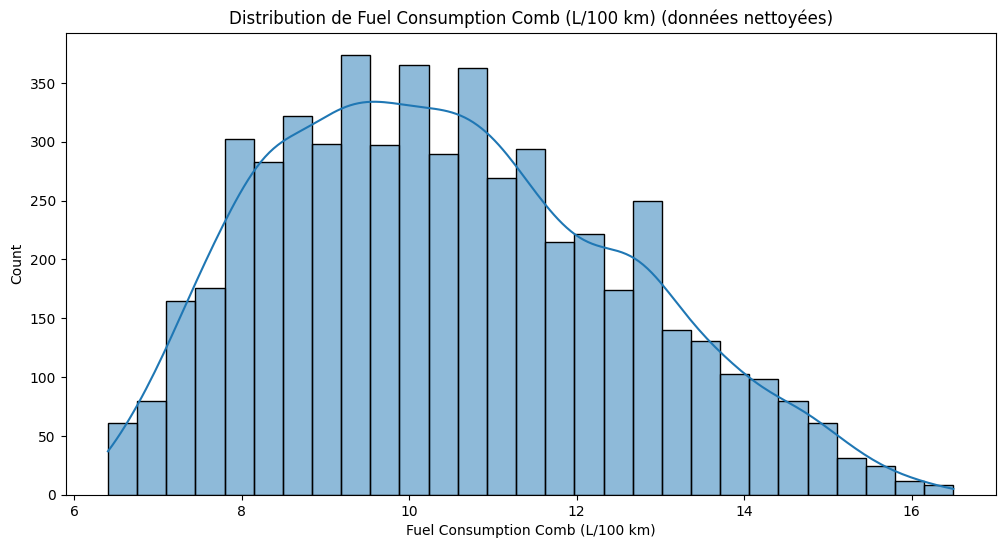

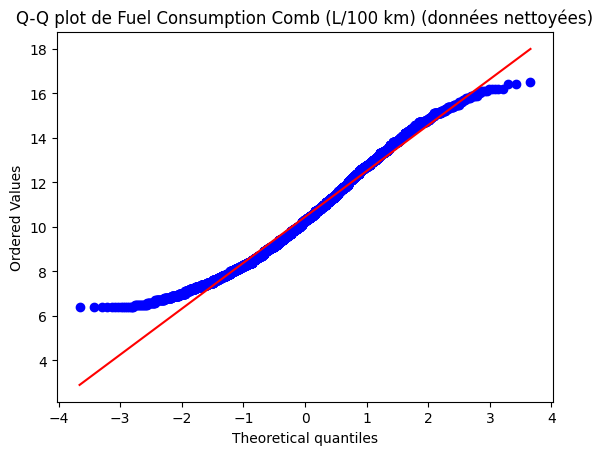

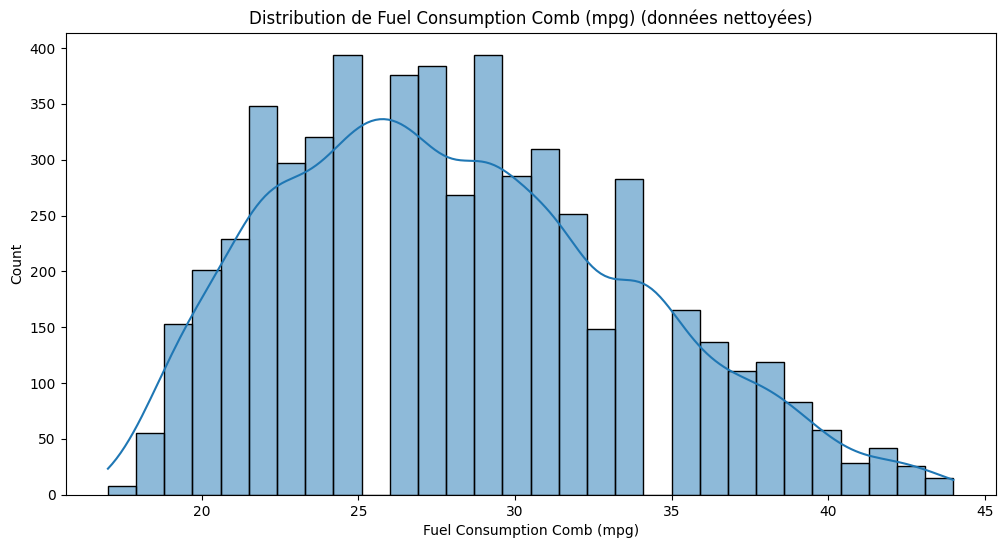

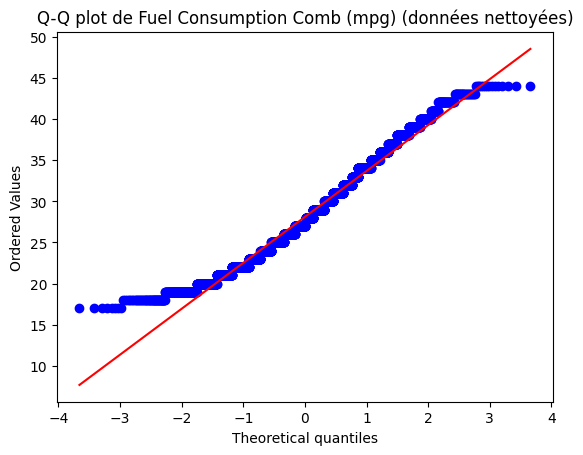

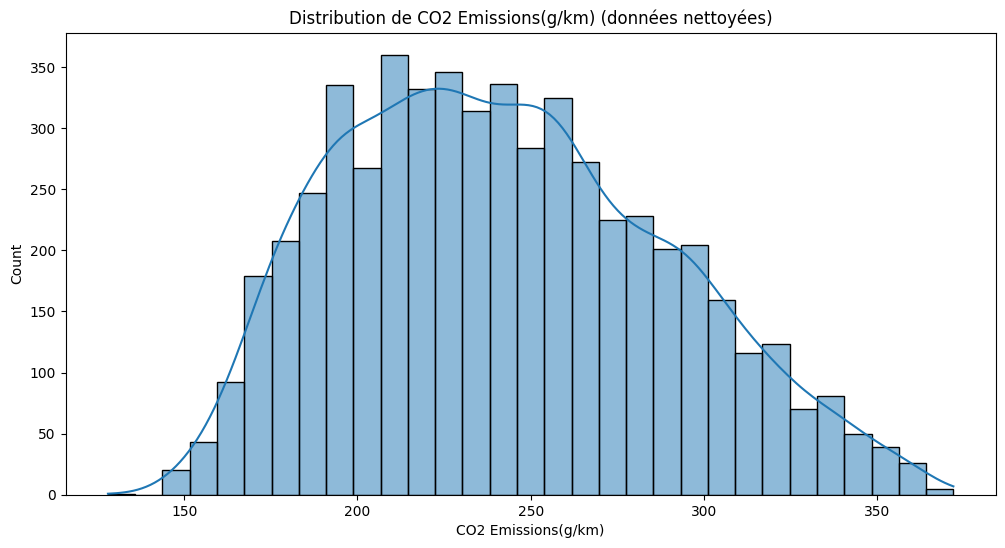

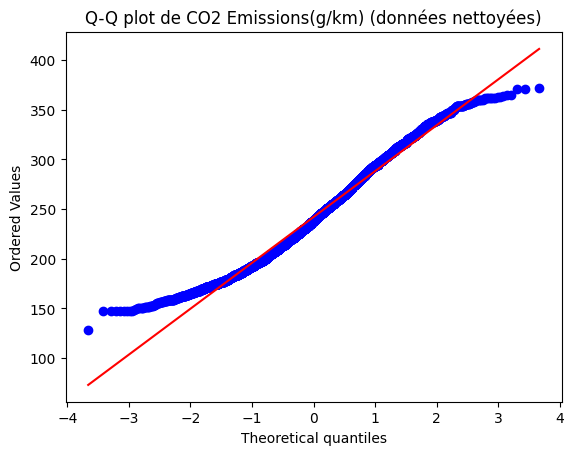

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Visualiser la distribution de chaque variable continue à partir du dataset nettoyé
variables = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
             'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 
             'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

for var in variables:
    plt.figure(figsize=(12, 6))
    
    # Histogramme avec une courbe de densité
    sns.histplot(df_cleaned[var], kde=True)
    plt.title(f"Distribution de {var} (données nettoyées)")
    plt.show()
    
    # Q-Q plot pour tester la normalité
    stats.probplot(df_cleaned[var].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q plot de {var} (données nettoyées)")
    plt.show()

### Analyse des graphiques : 
##### Graphiques de distribution: 
on observe une dissymétrie marquée, notamment pour Engine Size(L) et Fuel Consumption City (L/100 km), où les deux côtés de l'histogramme ne sont pas similaires.
Ces distributions ne semblent pas suivre une loi normale.
##### Q-Q Plots:
Les points s'éloignent de la droite, ce qui signifie que ces variables ne suivent pas une loi normale.

b. Analyse numérique: 
Nous évaluons également la normalité d'une manière numérique et pour cela nous utilisons le test de Kolmogorov-Smirnov, qui a pour objectif de qui comparer la distribution de nos données avec une distribution théorique (normale) pour évaluer si elles sont similaires. 

In [74]:
from scipy.stats import kstest

# Vérifier la normalité des colonnes numériques avec Kolmogorov-Smirnov
for var in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    _, p_value = kstest(df_cleaned[var], 'norm')
    
    # Afficher les résultats avec une interprétation du p-value
    if p_value < 0.05:
        print(f"P-valeur pour {var} (KS Test) : {p_value} - La variable n'est pas normale.")
    else:
        print(f"P-valeur pour {var} (KS Test) : {p_value} - La variable suit une distribution normale.")


P-valeur pour Engine Size(L) (KS Test) : 0.0 - La variable n'est pas normale.
P-valeur pour Cylinders (KS Test) : 0.0 - La variable n'est pas normale.
P-valeur pour Fuel Consumption City (L/100 km) (KS Test) : 0.0 - La variable n'est pas normale.
P-valeur pour Fuel Consumption Hwy (L/100 km) (KS Test) : 0.0 - La variable n'est pas normale.
P-valeur pour Fuel Consumption Comb (L/100 km) (KS Test) : 0.0 - La variable n'est pas normale.
P-valeur pour Fuel Consumption Comb (mpg) (KS Test) : 0.0 - La variable n'est pas normale.
P-valeur pour CO2 Emissions(g/km) (KS Test) : 0.0 - La variable n'est pas normale.


On a : 
Si p-valeur ≥ 0.05, la variable suit une distribution normale.
Si p-valeur < 0.05, la variable ne suit pas une distribution normale.

Dans ce cas : Toutes les p-valeurs sont extrêmement < 0.05, donc toutes les variables numériques du dataset ne suivent pas une loi normale.

# Normalisation
La normalisation transforme les données pour qu'elles soient sur la même échelle, facilitant leur traitement par les algorithmes. Elle garantit que les modèles ne soient pas influencés de manière disproportionnée par des variables à grande échelle.
Certains algorithmes comme la régression linéaire fonctionnent mieux avec des données normalisées.

In [44]:
from sklearn.preprocessing import StandardScaler

# Sélection des colonnes numériques à normaliser depuis df_cleaned
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Instancier le scaler
scaler = StandardScaler()

# Appliquer la normalisation sur les colonnes numériques de df_cleaned
df_normalized = df_cleaned.copy()
df_normalized[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])

# Afficher un aperçu des données normalisées
print("Aperçu des données après normalisation (df_selected) :")
print(df_normalized.head())

Aperçu des données après normalisation (df_selected) :
    Make    Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA      ILX       COMPACT       -0.816991  -0.879100          AS5   
1  ACURA      ILX       COMPACT       -0.448323  -0.879100           M6   
3  ACURA  MDX 4WD   SUV - SMALL        0.565514   0.502091          AS6   
4  ACURA  RDX AWD   SUV - SMALL        0.565514   0.502091          AS6   
5  ACURA      RLX      MID-SIZE        0.565514   0.502091          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                         -0.809634   
1         Z                         -0.292229   
3         Z                          0.304776   
4         Z                          0.065974   
5         Z                         -0.013627   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                        -1.185388                         -0.936550   
1                        -0.572474                     

Pour étudier les corrélations entre les variables numériques, Nous avons choisi d'utiliser la matrice de corrélation car elle permet une analyse exploratoire rapide des relations. 
Comme les variables de notre dataset ne suivent pas une distribution normale, la corrélation avec Spearman et Kendall, sont plus robustes aux distributions non normales et permettent de détecter des relations monotones.

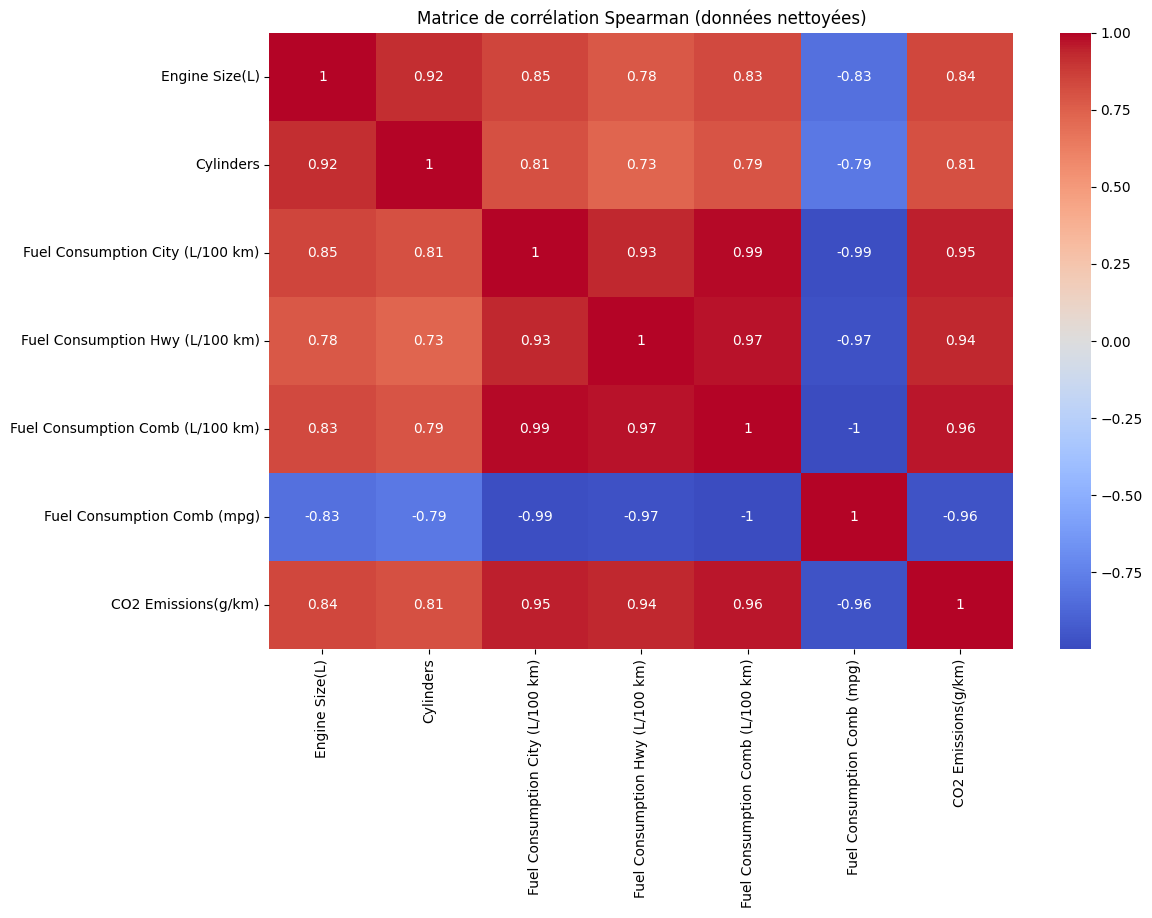

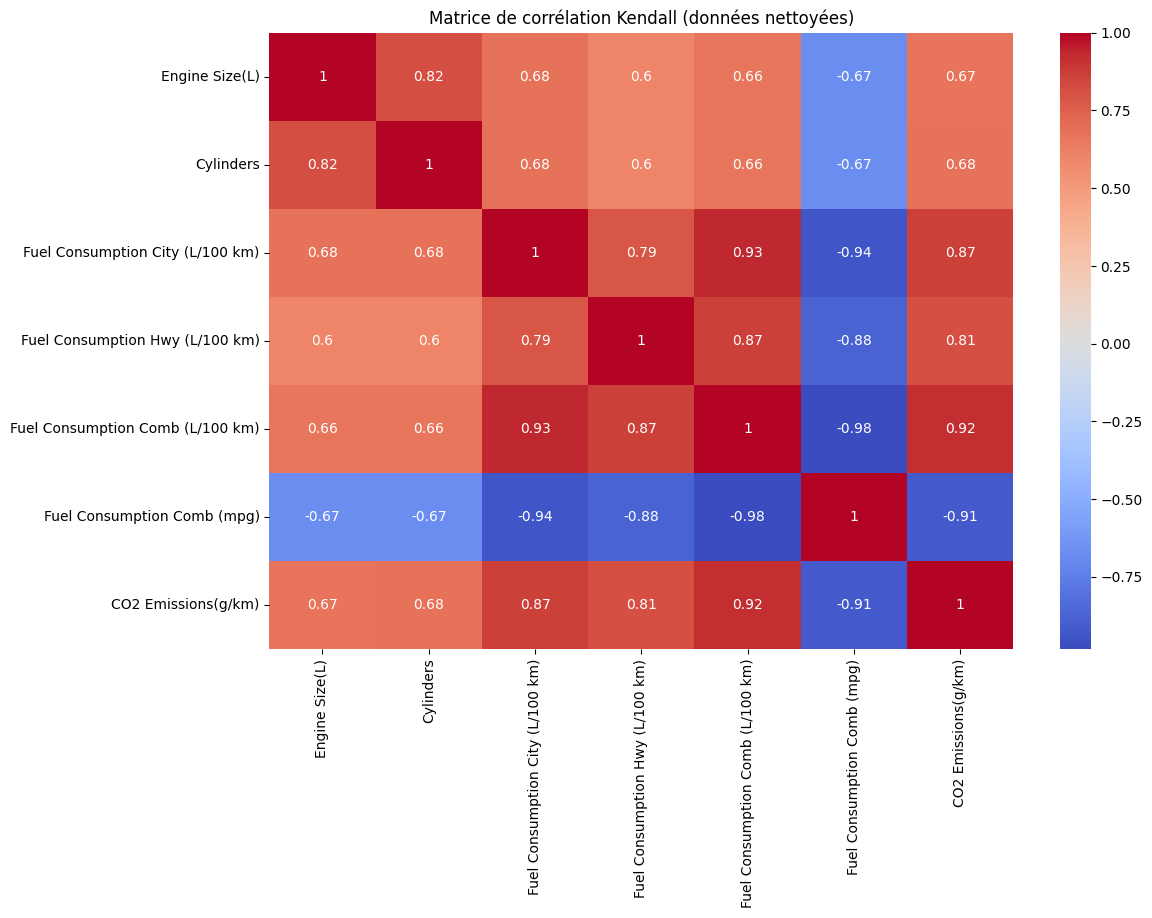

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer uniquement les colonnes numériques dans df_cleaned
numeric_df_normalized = df_normalized.select_dtypes(include=['float64', 'int64'])

# Calcul des deux matrices de corrélation
spearman_corr_normalized = numeric_df_normalized.corr(method='spearman')  # Relation monotone
kendall_corr_normalized = numeric_df_normalized.corr(method='kendall')    # Relation monotone robuste

# Afficher les matrices sous forme de heatmaps
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr_normalized, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation Spearman (données nettoyées)")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(kendall_corr_normalized, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation Kendall (données nettoyées)")
plt.show()


Relation entre CO2 Emissions (g/km) et les autres variables :

Fuel Consumption Comb (L/100 km) :
Très forte corrélation positive (Spearman = 0.96, Kendall = 0.92).
Cela confirme que la consommation combinée de carburant est le facteur le plus influent sur les émissions de CO2. Les véhicules consommant davantage de carburant émettent plus de CO2.

Fuel Consumption City (L/100 km) et Fuel Consumption Hwy (L/100 km) :
Corrélations fortes avec les émissions de CO2 (Spearman : 0.95 et 0.94 respectivement, Kendall : 0.87 et 0.81).
Ces variables influencent également significativement les émissions, mais légèrement moins que la consommation combinée.

Engine Size (L) :
Corrélation significative avec CO2 Emissions (Spearman = 0.84, Kendall = 0.67).
Cela montre que les véhicules avec des moteurs plus grands ont tendance à émettre davantage de CO2.

Cylinders :
Corrélation moyenne (Spearman = 0.81, Kendall = 0.68).
Cylinders est corrélé avec Engine Size: Les véhicules avec un plus grand nombre de cylindres consomment généralement plus de carburant et, par conséquent, émettent davantage de CO2, ce qui implique son impact sur la variable CO2 Emissions. 

Afin de vérifier si Fuel Consumption City et Fuel Consumption Hwy pourraient être redondants avec Fuel Consumption Comb, on calcule la correlation entre ces trois variables 

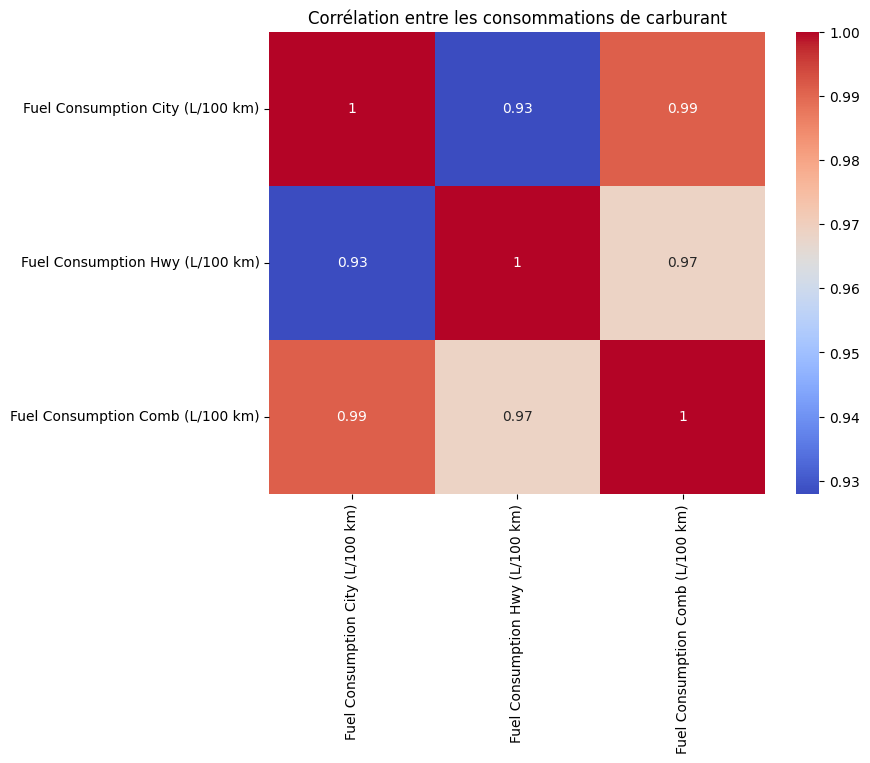

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation pour les trois variables
corr_matrix = df_normalized[['Fuel Consumption City (L/100 km)', 
                          'Fuel Consumption Hwy (L/100 km)', 
                          'Fuel Consumption Comb (L/100 km)']].corr()

# Afficher la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Corrélation entre les consommations de carburant")
plt.show()


Les résultats montrent que Fuel Consumption Comb (L/100 km) capture déjà la majorité de l’information contenue dans Fuel Consumption City et Fuel Consumption Hwy.
Pour éviter la multicolinéarité et la redondance dans le modèle, il est suffisant de conserver uniquement Fuel Consumption Comb (L/100 km).

Conclusion: 
Les variables Fuel Consumption Comb (L/100 km), Fuel Consumption City (L/100 km), et Fuel Consumption Hwy (L/100 km) sont les plus corrélées avec les émissions de CO2. Cela signifie que la consommation de carburant est le facteur principal à considérer dans la prédiction des émissions.

Les relations très fortes (entre consommation en ville, sur autoroute et combinée) peuvent indiquer une redondance des variables. Il pourrait être utile de supprimer certaines de ces variables pour éviter la multicolinéarité.

Engine Size (L) et Cylinders sont également des facteurs en corrélation avec CO2 Emissions

# Analyse des relations qualitatives - quantitatives
a. Visualisation graphique avec des boxplots

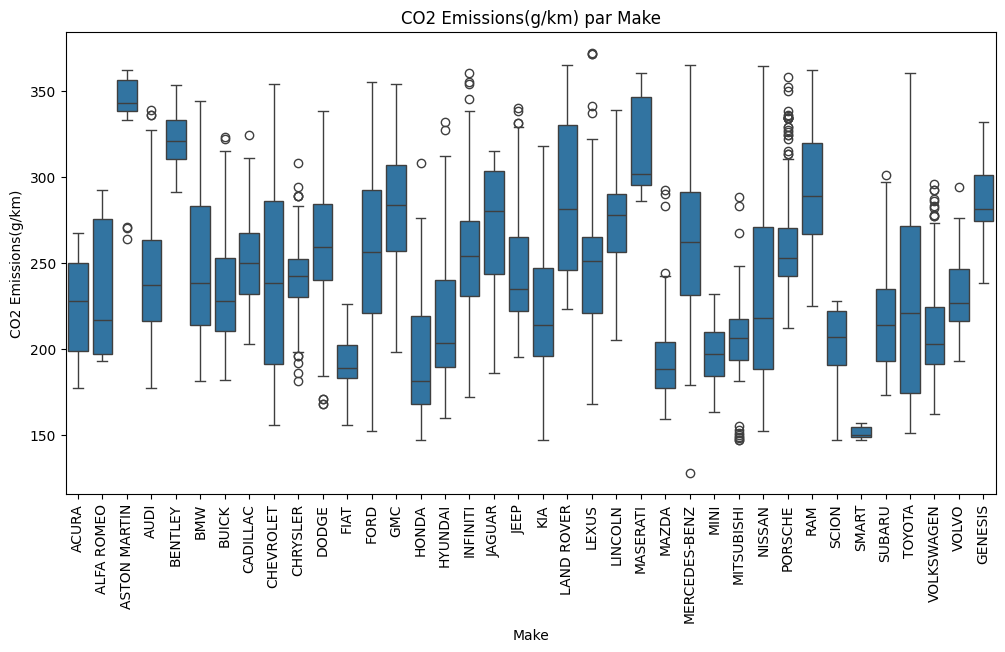

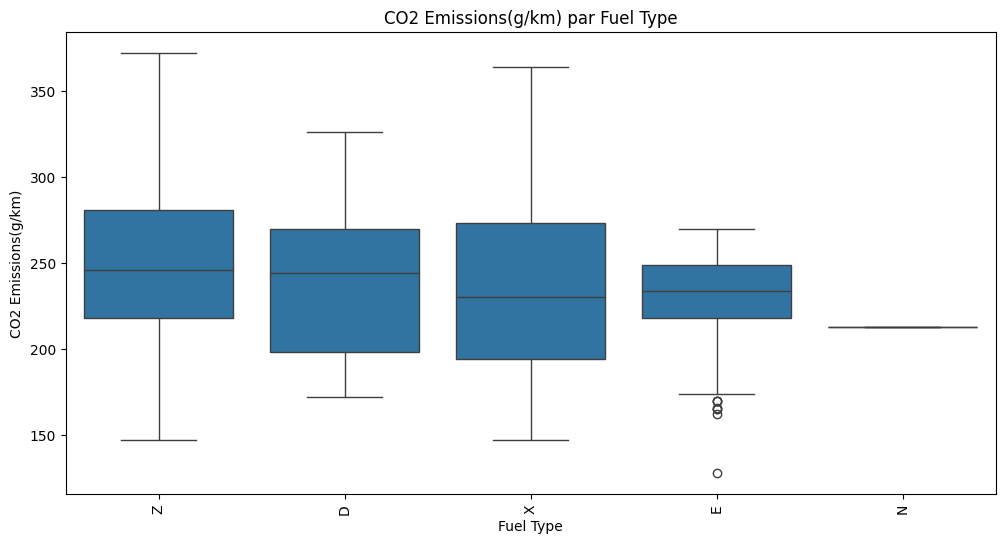

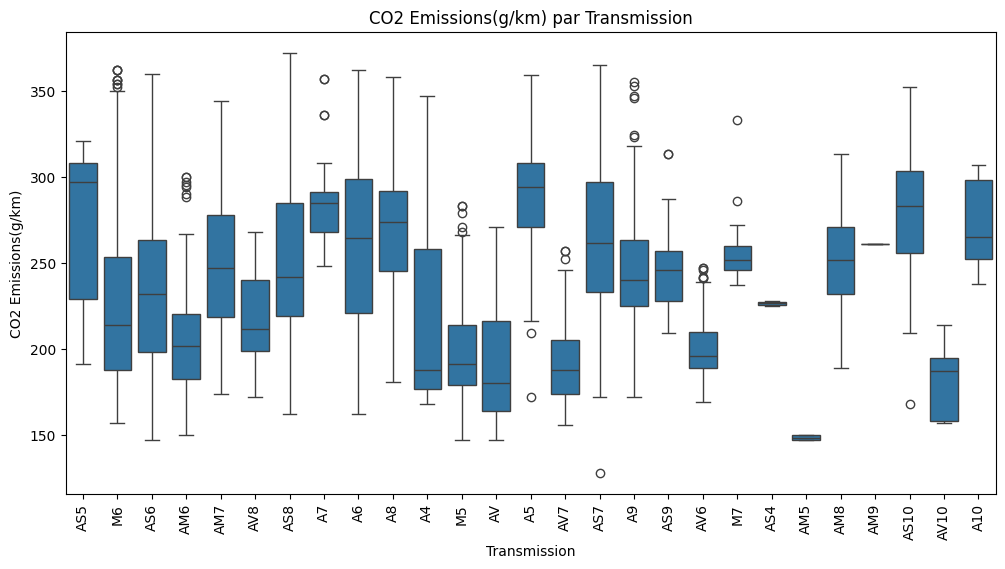

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des variables qualitatives
qualitative_vars = ['Make', 'Fuel Type', 'Transmission']

# Variable quantitative à analyser
quantitative_var = 'CO2 Emissions(g/km)'

for var in qualitative_vars:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_cleaned, x=var, y=quantitative_var)
    plt.xticks(rotation=90)  # Rotation pour mieux voir les catégories si elles sont nombreuses
    plt.title(f"{quantitative_var} par {var}")
    plt.show()

CO2 Emissions (g/km) par Make (marque) :
Les émissions de CO2 varient significativement selon les marques. Certaines marques (ex. Porsche, Bentley) ont une médiane d'émissions plus élevée, probablement en raison de la taille des moteurs ou du type de véhicules qu'elles produisent (sports ou luxe). D'autres marques (ex. Smart, Honda) présentent des valeurs plus faibles, typiques des véhicules économiques.

CO2 Emissions (g/km) par Fuel Type (type de carburant) :
Les véhicules alimentés en essence (E) ont des émissions de CO2 plus faibles, avec moins de dispersion. Les carburants comme le diesel (D) et autres types (Z, X) montrent des émissions plus élevées, ce qui pourrait être dû à des différences d'efficacité énergétique et de combustion.

CO2 Emissions (g/km) par Transmission (type de transmission) :
Les émissions de CO2 varient selon la transmission. Les transmissions automatiques avec plus de vitesses (ex. A10, AM10) semblent favoriser des valeurs plus faibles, probablement dues à une meilleure optimisation de la consommation. Les transmissions manuelles (M6, M7) ou automatiques plus anciennes (AM6, AS5) montrent souvent des valeurs plus élevées.

b. Analyse numérique:
Dans cette étape, nous avons choisi d'utiliser Kruskal-Wallis pour tester l'influence des variables qualitatives (Make, Fuel Type, Transmission) sur la variable quantitative CO2 Emissions(g/km).
Kruskal-Wallis ne fait aucune hypothèse sur la distribution des données. Il est donc adapté pour comparer des groupes lorsque les données ne suivent pas une loi normale
Si la p-valeur < 0,05, la variable influence significativement les émissions.

In [49]:
from scipy.stats import kruskal

# Liste des variables qualitatives
qualitative_vars = ['Make', 'Fuel Type', 'Transmission']
# Variable quantitative
quantitative_var = 'CO2 Emissions(g/km)'

for var in qualitative_vars:
    # Grouper les données selon les catégories de la variable qualitative
    groups = [df_normalized[df_normalized[var] == category][quantitative_var] for category in df_normalized[var].unique()]
    # Appliquer le test de Kruskal-Wallis
    stat, p_value = kruskal(*groups)
    print(f"Kruskal-Wallis pour {var} et {quantitative_var}: stat = {stat}, p-value = {p_value}")


Kruskal-Wallis pour Make et CO2 Emissions(g/km): stat = 1689.091666572887, p-value = 0.0
Kruskal-Wallis pour Fuel Type et CO2 Emissions(g/km): stat = 146.7412931137421, p-value = 1.0160957241627692e-30
Kruskal-Wallis pour Transmission et CO2 Emissions(g/km): stat = 1316.3539598978248, p-value = 2.0189406646410616e-261


Pour chacune des variables qualitatives, les résultats montrent une p-valeur extrêmement faible (p < 0,05), ce qui indique que :
La marque (Make) a une influence significative sur les émissions de CO2.
Le type de carburant (Fuel Type) est également un facteur influençant.
La transmission (Transmission) a un effet significatif sur les émissions.
Ces résultats confirment que ces variables qualitatives doivent être prises en compte dans l'analyse des facteurs influençant les émissions de CO2.

# Relations qualitatives - qualitatives
Pour analyser la correlation entre nos variables qualitatives, on utilise le test de Chi². Il permet de quantifier l'intensité de la relation entre les catégories des deux variables qualitatives grâce à la statistique de Chi².

In [50]:
from scipy.stats import chi2_contingency

# Liste des variables qualitatives
qualitative_vars = ['Make', 'Fuel Type', 'Transmission']

# Tester toutes les paires de variables qualitatives
for i in range(len(qualitative_vars)):
    for j in range(i + 1, len(qualitative_vars)):
        var1 = qualitative_vars[i]
        var2 = qualitative_vars[j]
        
        # Créer une table de contingence
        contingency_table = pd.crosstab(df_normalized[var1], df_normalized[var2])
        # Test du Chi²
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi² entre {var1} et {var2}: Chi² = {chi2}, p-value = {p}")

Chi² entre Make et Fuel Type: Chi² = 4882.102842822265, p-value = 0.0
Chi² entre Make et Transmission: Chi² = 25655.22804934746, p-value = 0.0
Chi² entre Fuel Type et Transmission: Chi² = 2655.1215275270424, p-value = 0.0


Make et Fuel Type : Chi² = 4882.10, p-value = 0.0
Cela indique une relation significative entre la marque du véhicule et le type de carburant utilisé. Certaines marques semblent privilégier des carburants spécifiques.

Make et Transmission :Chi² = 25655.23, p-value = 0.0
Une association forte est observée entre la marque et le type de transmission. Les constructeurs automobiles associent probablement leurs marques à des technologies de transmission précises.

Fuel Type et Transmission : Chi² = 2655.12, p-value = 0.0
Le type de carburant est significativement lié au choix de la transmission. Certains carburants pourraient être optimisés pour des types spécifiques de transmission.

Conclusion :
Ces variables qualitatives ne sont pas indépendantes. Par exemple :
Les marques ont des préférences pour des combinaisons spécifiques de carburant et de transmission.
Le choix du type de carburant influence celui de la transmission.

En combinant tous les résultats, les variables à conserver sont: 

Fuel Consumption Comb (L/100 km) (priorité principale).
Engine Size (L).
Cylinders
Make : Pour observer les variations entre marques.
Fuel Type : Pour analyser l’impact du carburant sur les émissions.
Transmission : Pour inclure les effets de la transmission sur les émissions.

In [82]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Variables numériques et qualitatives
numerical_vars = [
    'Fuel Consumption Comb (L/100 km)',
    'Engine Size(L)',
    'Cylinders',
    'CO2 Emissions(g/km)'
]
qualitative_vars = ['Make', 'Fuel Type', 'Transmission']

# Vérification du dataset de base avant toute modification
print("Dimensions du dataset de base (df_normalized) :", df_normalized.shape)

# Sélectionner les variables pertinentes (numériques et qualitatives)
df_selected = df_normalized[numerical_vars + qualitative_vars].copy()

# Afficher les dimensions après la sélection des variables
print("Dimensions du dataset après sélection des variables pertinentes :", df_selected.shape)



Dimensions du dataset de base (df_normalized) : (5488, 12)
Dimensions du dataset après sélection des variables pertinentes : (5488, 7)


### Validation des hypothèses
Nous utilisons des tests statistiques et des visualisations pour confirmer ou rejeter nos hypothèses précédentes.
###### Hypothèse 1 : La taille du moteur est positivement corrélée avec les émissions de CO2.
On vérifie ça de manière graphique et statistique

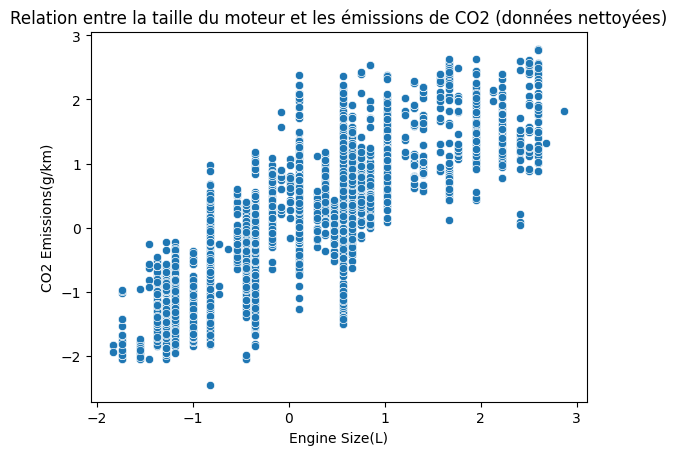

Corrélation Spearman entre Engine Size et CO2 (données nettoyées) : 0.8410432824640407, p-value : 0.0


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Scatter plot pour visualiser la relation avec df_cleaned
sns.scatterplot(data=df_normalized, x='Engine Size(L)', y='CO2 Emissions(g/km)')
plt.title("Relation entre la taille du moteur et les émissions de CO2 (données nettoyées)")
plt.show()

# Test de corrélation Spearman avec df_cleaned
corr, p_value = spearmanr(df_normalized['Engine Size(L)'], df_normalized['CO2 Emissions(g/km)'])
print(f"Corrélation Spearman entre Engine Size et CO2 (données nettoyées) : {corr}, p-value : {p_value}")


Le graphique de dispersion montre une relation positive claire entre la taille du moteur et les émissions de CO2. De plus, la corrélation Spearman est très élevée et significative, confirmant que cette hypothèse est juste.
###### Hypothèse 2 : La consommation combinée est positivement corrélée avec les émissions de CO2.

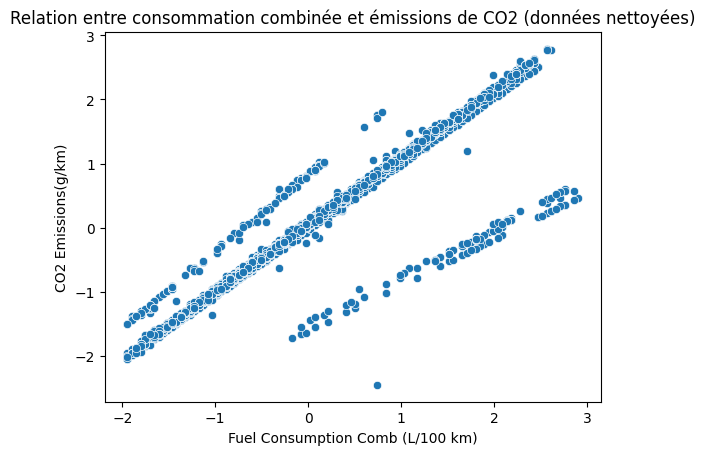

Corrélation Spearman entre Fuel Consumption Comb et CO2 (données nettoyées) : 0.9610066068138796, p-value : 0.0


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Scatter plot pour la consommation combinée avec df_cleaned
sns.scatterplot(data=df_normalized, x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)')
plt.title("Relation entre consommation combinée et émissions de CO2 (données nettoyées)")
plt.show()

# Test de corrélation Spearman avec df_cleaned
corr, p_value = spearmanr(df_normalized['Fuel Consumption Comb (L/100 km)'], df_normalized['CO2 Emissions(g/km)'])
print(f"Corrélation Spearman entre Fuel Consumption Comb et CO2 (données nettoyées) : {corr}, p-value : {p_value}")

Le graphique de dispersion indique une forte corrélation positive entre la consommation combinée et les émissions de CO2. La corrélation Spearman utilisée confirme également cette relation avec une valeur proche de 1 et une p-valeur significative, donc cette hypothèse est vérifiée.
###### Hypothèse 3 : 
Les véhicules diesel émettent moins de CO2 que ceux à essence.

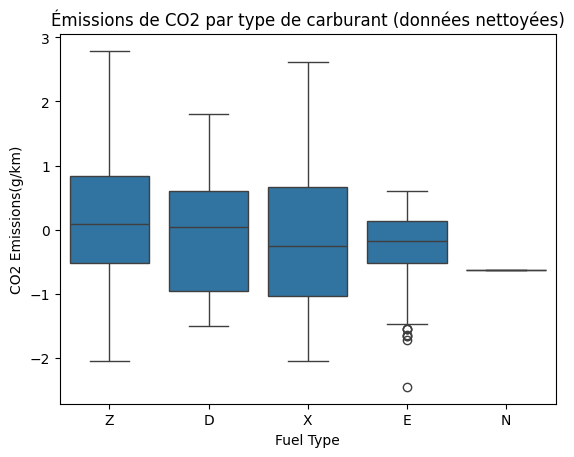

Kruskal-Wallis entre diesel et essence (données nettoyées) : Stat = 11.399961901598786, p-value = 0.0007344561220526068


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# Boxplot pour comparer les émissions par type de carburant (données nettoyées et normalisées)
sns.boxplot(data=df_normalized, x='Fuel Type', y='CO2 Emissions(g/km)')
plt.title("Émissions de CO2 par type de carburant (données nettoyées)")
plt.show()

# Test statistique (Kruskal-Wallis) avec df_normalized
diesel = df_normalized[df_normalized['Fuel Type'] == 'D']['CO2 Emissions(g/km)']
essence = df_normalized[df_normalized['Fuel Type'] == 'Z']['CO2 Emissions(g/km)']
stat, p_value = kruskal(diesel, essence)
print(f"Kruskal-Wallis entre diesel et essence (données nettoyées) : Stat = {stat}, p-value = {p_value}")


Le boxplot montre que les véhicules diesel ont des émissions légèrement inférieures à celles des véhicules à essence. Cependant, cette différence n’est pas extrêmement marquée. Le test statistique Kruskal-Wallis confirme que cette différence est significative, ce qui valide partiellement l'hypothèse.
###### Hypothèse 4 : 
La transmission influence significativement les émissions de CO2.

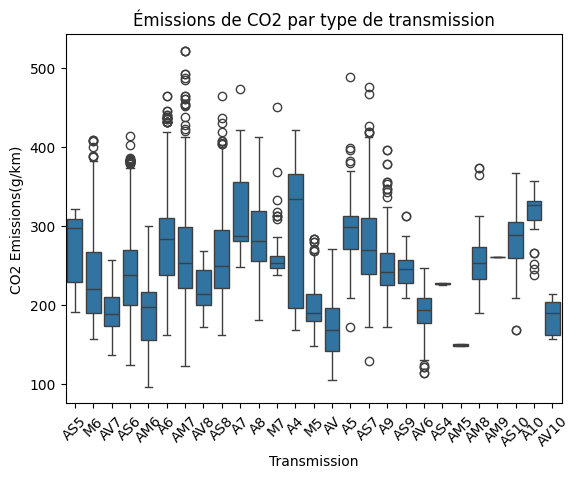

Kruskal-Wallis pour Transmission : Stat = 2127.40984940723, p-value = 0.0


In [25]:
# Boxplot pour visualiser l'influence de la transmission
sns.boxplot(data=df, x='Transmission', y='CO2 Emissions(g/km)')
plt.title("Émissions de CO2 par type de transmission")
plt.xticks(rotation=45)
plt.show()

# Test statistique (ANOVA ou Kruskal-Wallis si les données ne sont pas normales)
groups = [df[df['Transmission'] == t]['CO2 Emissions(g/km)'] for t in df['Transmission'].unique()]
stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis pour Transmission : Stat = {stat}, p-value = {p_value}")


Le boxplot pour les types de transmission montre des variations significatives dans les émissions de CO2 en fonction des types de transmission. Cela est confirmé par le test statistique (Kruskal-Wallis), qui indique une p-valeur significative. Cette hypothèse est donc validée.

Ce projet visant à prédire les emissions de CO2 est un problème de régression. Les modèles qu'on peut appliquer dans ce contexte là, comme Régression linéaire, Arbres de décision, Forêts aléatoires, etc., ne peuvent pas travailler directement avec des variables catégorielles (comme "Make", "Fuel Type" ou "Transmission"), ils nécessitent des données numériques, c'est pour ça que nous utilisons OneHotEncoder qui permet de convertir des variables catégorielles en variables numériques.
Nous avons choisi OneHotEncoder comme il n'y a pas d'ordre entre les valeurs de nos variables. 
Pour chaque valeur unique d'une variable catégorielle, OneHotEncoder crée une nouvelle colonne binaire.
Chaque colonne prend la valeur 1 si la valeur de cette observation correspond à la colonne créée, sinon elle prend 0. 
Nous utilisons OneHotEncoder dans un ColumnTransformer car ça permet de traiter simultanément les variables numériques et catégorielles dans le même pipeline.

In [27]:
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin

# Ignore les avertissements (optionnel)
warnings.filterwarnings('ignore', category=UserWarning, message='.*found unknown categories.*')

# Custom Transformer to Convert Sparse Matrix to Dense
class DenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X.toarray() if hasattr(X, "toarray") else X

# Définir les colonnes catégorielles et numériques
cat_features = ['Make', 'Fuel Type', 'Transmission']
num_features = ['Fuel Consumption Comb (L/100 km)', 'Engine Size(L)', 'Cylinders']

# Séparer les features et la cible
X = df_normalized.drop(columns=['CO2 Emissions(g/km)'])
y = df_normalized['CO2 Emissions(g/km)']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline pour les transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore')),
            ('to_dense', DenseTransformer())  # Convertir en dense après encodage
        ]), cat_features)
    ]
)

# Algorithmes proposés par la prof
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Hist Gradient Boosting': HistGradientBoostingRegressor(random_state=42)
}

# Résultats pour chaque modèle
results_prof = {}
for name, model in models.items():
    # Pipeline avec le modèle actuel
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Validation croisée
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_mse = -scores.mean()  # Moyenne des MSE en validation croisée
    cv_std = scores.std()    # Écart-type
    
    # Évaluation sur le test set
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    
    # Stocker les résultats
    results_prof[name] = {
        'CV Mean MSE': cv_mse,
        'CV Std': cv_std,
        'Test MSE': test_mse
    }
    
    # Afficher les résultats
    print(f'{name}:')
    print(f'  Cross-Validation Mean MSE = {cv_mse:.2f}')
    print(f'  Cross-Validation Std = {cv_std:.2f}')
    print(f'  Test Set MSE = {test_mse:.2f}')
    print('-' * 40)


Linear Regression:
  Cross-Validation Mean MSE = 27758263176396222464.00
  Cross-Validation Std = 39112742374831579136.00
  Test Set MSE = 0.07
----------------------------------------
Ridge Regression:
  Cross-Validation Mean MSE = 0.05
  Cross-Validation Std = 0.01
  Test Set MSE = 0.07
----------------------------------------
Decision Tree:
  Cross-Validation Mean MSE = 0.02
  Cross-Validation Std = 0.00
  Test Set MSE = 0.02
----------------------------------------
Random Forest:
  Cross-Validation Mean MSE = 0.00
  Cross-Validation Std = 0.00
  Test Set MSE = 0.01
----------------------------------------
Hist Gradient Boosting:
  Cross-Validation Mean MSE = 0.01
  Cross-Validation Std = 0.00
  Test Set MSE = 0.01
----------------------------------------


OneHotEncoder transforme les colonnes catégorielles en variables indicatrices sous forme de matrices sparses, économes en mémoire. Ces matrices sparses sont utiles pour les grandes données car elles ne stockent que les positions des valeurs non nulles. Mais ne sont pas compatibles avec certains modèles comme LinearRegression et DecisionTreeRegressor qui nécessitent des données denses. C'est pour cette raison que nous ajoutons un DenseTransformer dans le pipeline, qui vérifie si les données sont en format sparse. Si oui, il les convertit en dense avec .toarray()

Dans le ColumnTransformer, les colonnes catégorielles passent d’abord par OneHotEncoder, puis par DenseTransformer pour garantir qu’elles sont au format dense.

Nous utilisons également la validation croisée (cross-validation), qui permet d'évaluer la robustesse et la performance des modèles utilisés en évitant le surapprentissage (overfitting). Elle consiste à diviser les données en plusieurs folds, à entraîner le modèle sur certaines et à le tester sur les autres, de manière répétée.

Problème potentiel avec la régression linéaire: 
- Multicolinéarité: 
Certaines variables explicatives (comme la taille du moteur et la consommation de carburant) peuvent être fortement corrélées entre elles.
Cela rend difficile pour la régression linéaire de distinguer leurs effets individuels sur la cible.

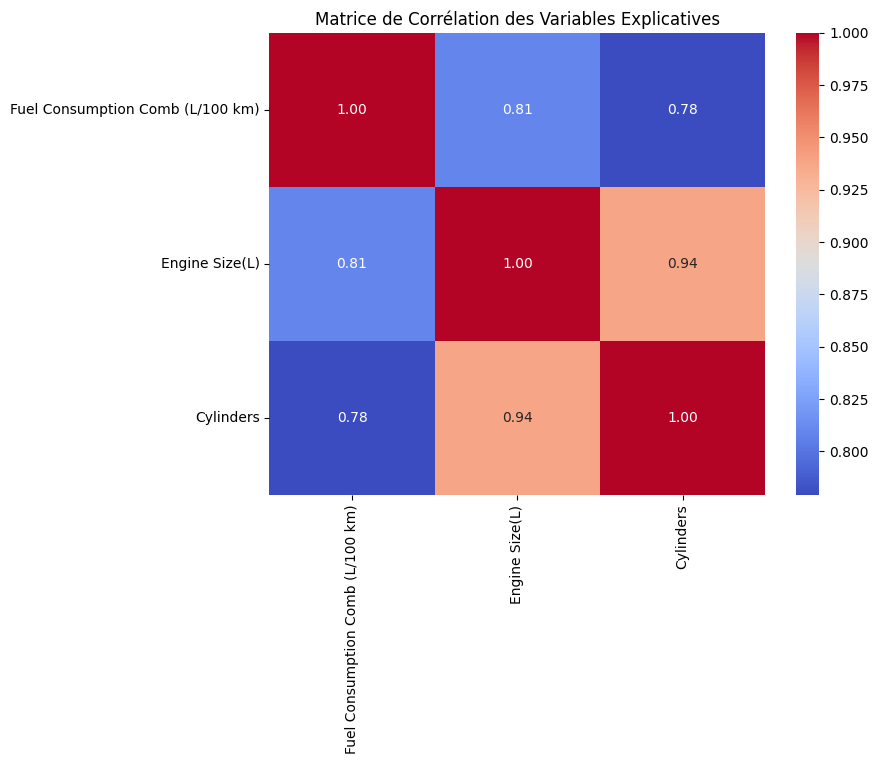

In [28]:
# Vérification de multicolinéarité
corr_matrix = df_normalized[num_features].corr()

# Heatmap des corrélations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corrélation des Variables Explicatives")
plt.show()


La matrice indique que :

Les variables explicatives présentent une corrélation élevée entre elles, notamment :
Fuel Consumption et Engine Size : 0,81
Cylinders et Engine Size : 0,94
Cela valide notre hypothèse de multicolinéarité, car la multicolinéarité peut perturber les estimations des coefficients de la régression linéaire, rendant les prédictions moins fiables.

La Ridge Regression améliore les performances par rapport à la Régression Linéaire simple. Cela indique qu'elle a bien géré la multicolinéarité en régularisant les coefficients pour éviter les amplifications dues aux corrélations élevées entre les variables explicatives.
Toutefois, son MSE reste significativement plus élevé que les autres modèles, suggérant que la relation entre les variables explicatives et les émissions de CO2 n'est pas purement linéaire et/ou que la Ridge est moins performante pour capturer des relations complexes ou non linéaires.

Le Decision Tree a une excellente performance, avec un MSE bien plus faible que celui de la Ridge Regression. Cela montre qu'il a capté les relations non linéaires ou interactions entre variables explicatives.
La faible variance (écart-type) sur les données de validation suggère une bonne robustesse.



In [38]:
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import os
import sys

# Suppress warnings and unnecessary logs
warnings.filterwarnings('ignore', category=UserWarning)
os.environ['LIGHTGBM_VERBOSITY'] = '0'  # Silence LightGBM logs
os.environ['CATBOOST_LOGGING_LEVEL'] = 'Silent'  # Silence CatBoost logs

# Silence stdout for specific libraries
class SilentLogger:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_value, traceback):
        sys.stdout.close()
        sys.stdout = self._original_stdout

# Define categorical and numerical columns
cat_features = ['Make', 'Fuel Type', 'Transmission']
num_features = ['Fuel Consumption Comb (L/100 km)', 'Engine Size(L)', 'Cylinders']

# Split features and target
X = df_normalized.drop(columns=['CO2 Emissions(g/km)'])
y = df_normalized['CO2 Emissions(g/km)']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ]
)

# Define models
models = {
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0),
    'SVR': SVR(kernel='rbf')
}

# Results dictionary
results = {}

# Cross-validation folds
cv_folds = 5

# Loop to execute and display results
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Cross-validation
    with SilentLogger():  # Suppress logs during training
        scores = cross_val_score(pipeline, X_train, y_train, cv=cv_folds, scoring='neg_mean_squared_error')
        pipeline.fit(X_train, y_train)
    
    # Calculate metrics
    cv_mse = -scores.mean()
    cv_std = scores.std()
    y_pred = pipeline.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    
    # Store results
    results[name] = {
        'CV Mean MSE': cv_mse,
        'CV Std': cv_std,
        'Test MSE': test_mse
    }
    
    # Clean display of results
    print(f"\nModel: {name}")
    print(f"  Cross-Validation Mean MSE: {cv_mse:.4f}")
    print(f"  Cross-Validation Std      : {cv_std:.4f}")
    print(f"  Test Set MSE              : {test_mse:.4f}")
    print("-" * 40)



Model: XGBoost
  Cross-Validation Mean MSE: 0.0041
  Cross-Validation Std      : 0.0016
  Test Set MSE              : 0.0049
----------------------------------------

Model: LightGBM
  Cross-Validation Mean MSE: 0.0055
  Cross-Validation Std      : 0.0017
  Test Set MSE              : 0.0072
----------------------------------------

Model: CatBoost
  Cross-Validation Mean MSE: 0.0036
  Cross-Validation Std      : 0.0016
  Test Set MSE              : 0.0048
----------------------------------------

Model: SVR
  Cross-Validation Mean MSE: 0.0076
  Cross-Validation Std      : 0.0012
  Test Set MSE              : 0.0086
----------------------------------------


1. XGBoost
Cross-Validation Mean MSE: 0.0041
Cross-Validation Std: 0.0016
Test Set MSE: 0.0049
Analyse :
XGBoost offre une bonne performance, avec un MSE moyen en validation croisée de 0.0041 et une erreur faible sur le test (0.0049). La variation des scores (écart-type) est modérée, ce qui indique une certaine stabilité des prédictions sur différents plis. Cela en fait un modèle fiable pour ce jeu de données.

2. LightGBM
Cross-Validation Mean MSE: 0.0055
Cross-Validation Std: 0.0017
Test Set MSE: 0.0072
Analyse :
LightGBM est légèrement moins performant que XGBoost, avec une erreur en validation croisée et sur le test légèrement plus élevées. L’écart-type est comparable, ce qui montre une stabilité relative. Bien que LightGBM soit souvent plus rapide que XGBoost, ses prédictions ici semblent légèrement moins précises.

3. CatBoost
Cross-Validation Mean MSE: 0.0036
Cross-Validation Std: 0.0016
Test Set MSE: 0.0048
Analyse :
CatBoost montre la meilleure performance globale, avec la MSE la plus basse en validation croisée (0.0036) et sur le test (0.0048). L’écart-type est similaire à celui des autres modèles (0.0016), indiquant une stabilité comparable. Ce modèle est particulièrement efficace dans les situations où les données contiennent des variables catégorielles complexes.

4. SVR (Support Vector Regression)
Cross-Validation Mean MSE: 0.0076
Cross-Validation Std: 0.0012
Test Set MSE: 0.0086
Analyse :
SVR est le modèle le moins performant parmi les quatre. Il présente une erreur plus élevée en validation croisée (0.0076) et sur le test (0.0086). L’écart-type est légèrement plus faible, mais cela ne compense pas son manque de précision. SVR semble moins adapté pour ce problème, probablement en raison de la complexité des relations dans les données.

Comparaison globale :
CatBoost est le meilleur modèle, combinant précision et stabilité.
XGBoost est proche, performant de manière presque équivalente mais légèrement moins précis.
LightGBM est performant mais légèrement en retrait, tout en restant rapide à entraîner.
SVR n’est pas bien adapté ici, avec une erreur significativement plus élevée.

### Comparaison les prédictions vs valeurs réelles.

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 277
[LightGBM] [Info] Number of data points in the train set: 5908, number of used features: 68
[LightGBM] [Info] Start training from score -0.001232


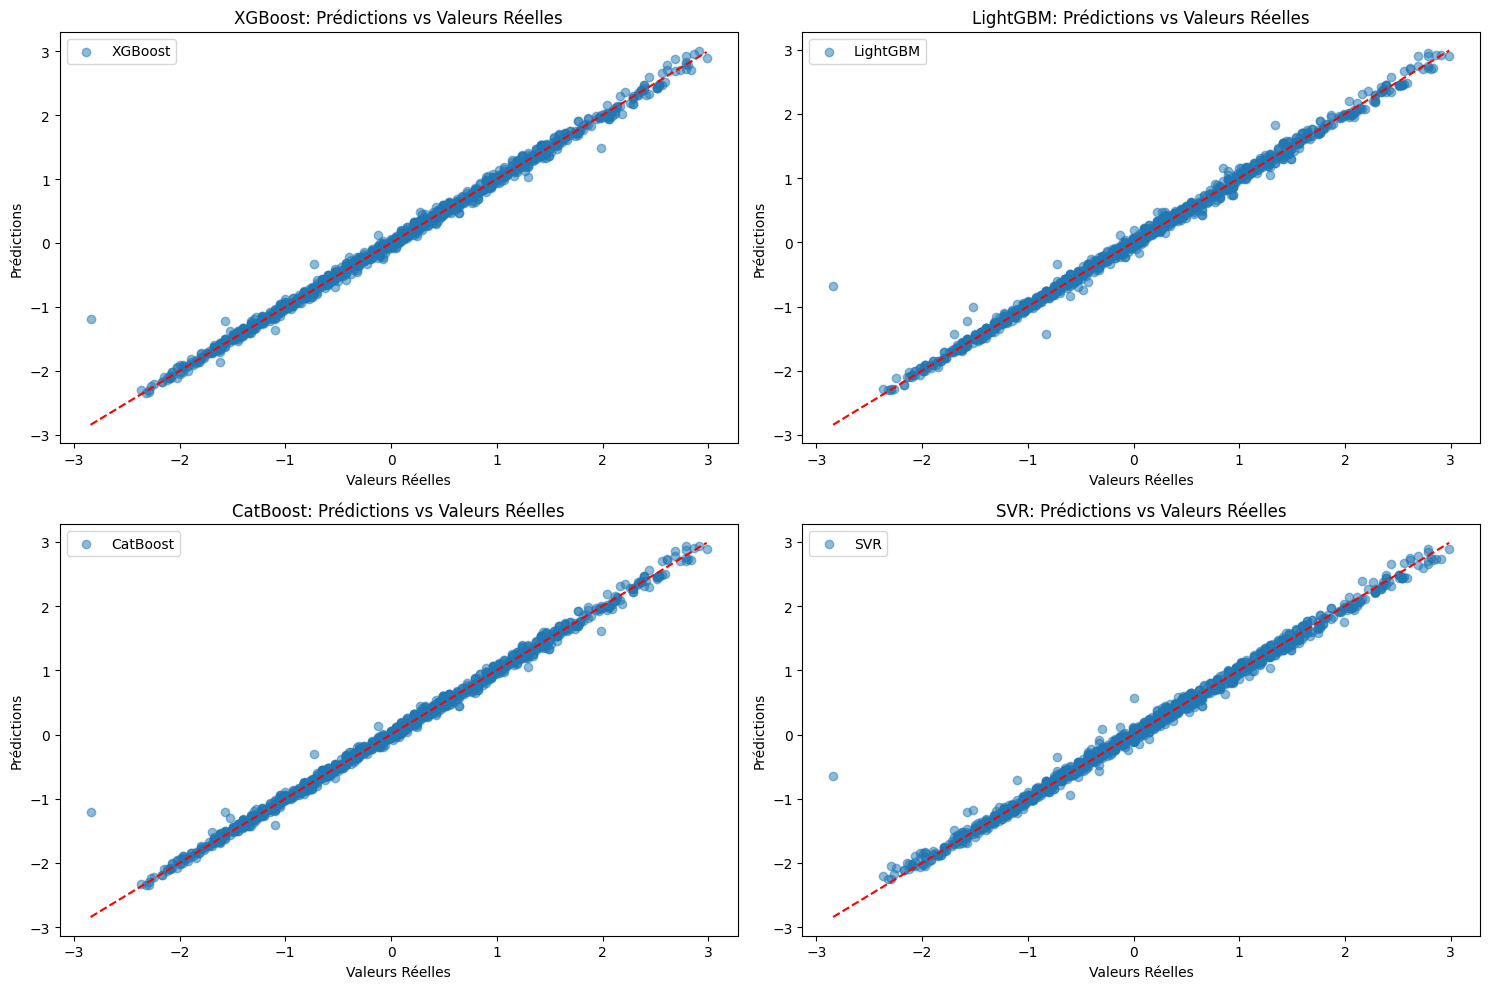

In [41]:
import matplotlib.pyplot as plt

# Calcul des prédictions pour chaque modèle
predictions = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    predictions[name] = pipeline.predict(X_test)

# Plot pour chaque modèle
plt.figure(figsize=(15, 10))
for i, (model_name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.5, label=model_name)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title(f'{model_name}: Prédictions vs Valeurs Réelles')
    plt.xlabel('Valeurs Réelles')
    plt.ylabel('Prédictions')
    plt.legend()
    plt.tight_layout()
plt.show()

### Etude la distribution des erreurs (résidus).

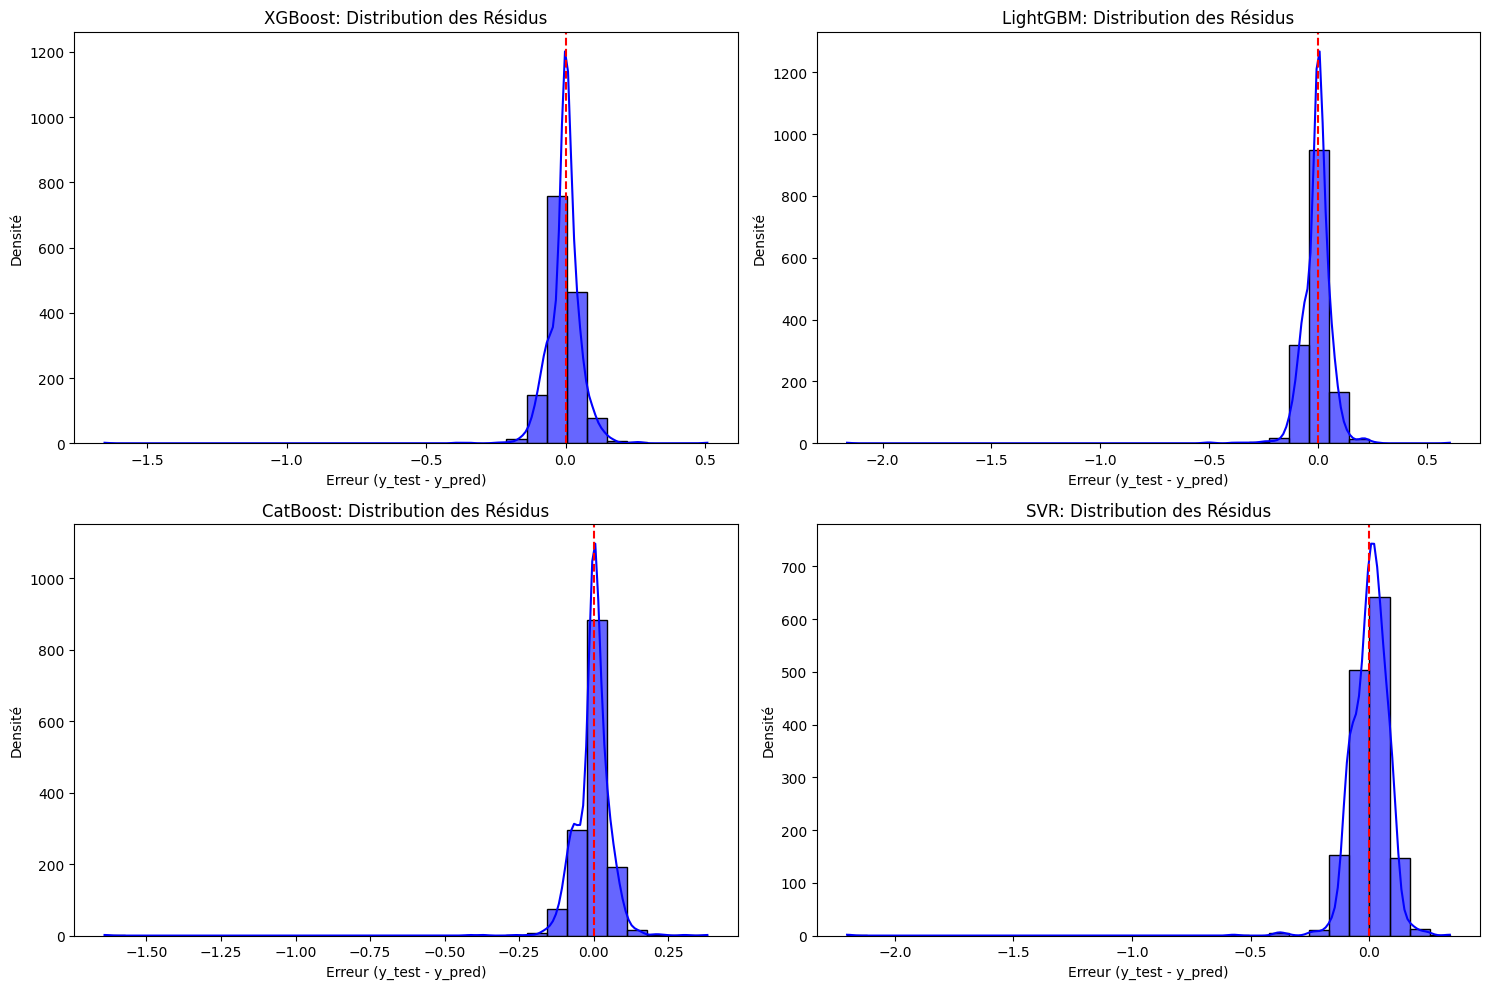

In [42]:
import seaborn as sns

# Distribution des erreurs (résidus)
plt.figure(figsize=(15, 10))
for i, (model_name, y_pred) in enumerate(predictions.items(), 1):
    residuals = y_test - y_pred
    plt.subplot(2, 2, i)
    sns.histplot(residuals, kde=True, bins=30, color='blue', alpha=0.6)
    plt.axvline(0, color='red', linestyle='--')
    plt.title(f'{model_name}: Distribution des Résidus')
    plt.xlabel('Erreur (y_test - y_pred)')
    plt.ylabel('Densité')
    plt.tight_layout()
plt.show()

### Comparaison des MSE des modèles

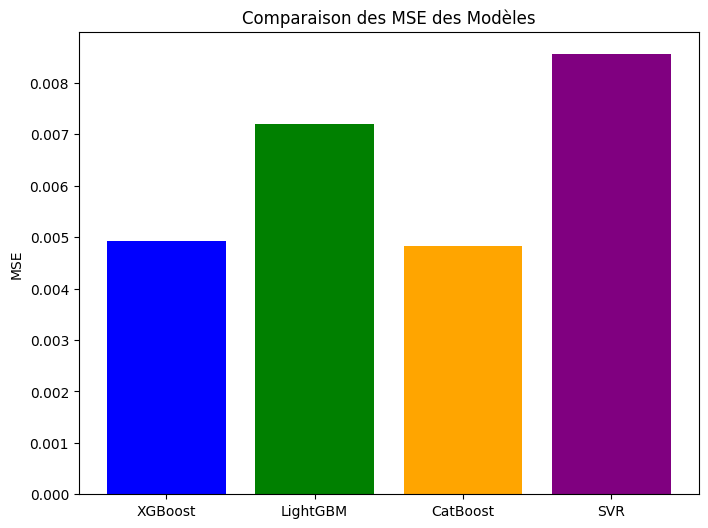

In [43]:
# Comparaison des MSE pour chaque modèle
mse_scores = {name: results[name]['Test MSE'] for name in results.keys()}

plt.figure(figsize=(8, 6))
plt.bar(mse_scores.keys(), mse_scores.values(), color=['blue', 'green', 'orange', 'purple'])
plt.title('Comparaison des MSE des Modèles')
plt.ylabel('MSE')
plt.show()